In [1]:
%%capture
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
from neuronunit.optimisation.optimization_management import test_all_objective_test
import numpy as np
from IPython.display import display, HTML
from neuronunit.plottools import plot_score_history1
from neuronunit.optimisation.optimization_management import check_binary_match
from neuronunit.optimisation.optimization_management import inject_and_plot_model, TSD
import pandas as pd

# Simulated Data 
and select model parameters that are free to vary


In [2]:
%%capture
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.tests.fi import RheobaseTestP

params = MODEL_PARAMS["RAW"];
fps = params.keys()#['C','peak_v','b']
model_type="RAW"
sim_tests, OM, target = test_all_objective_test(fps,model_type=model_type)
sim_tests["RheobaseTest"] = RheobaseTestP(sim_tests["RheobaseTest"].observation)
sim_tests = TSD(sim_tests)


# Meta Parameters

<Figure size 640x480 with 0 Axes>

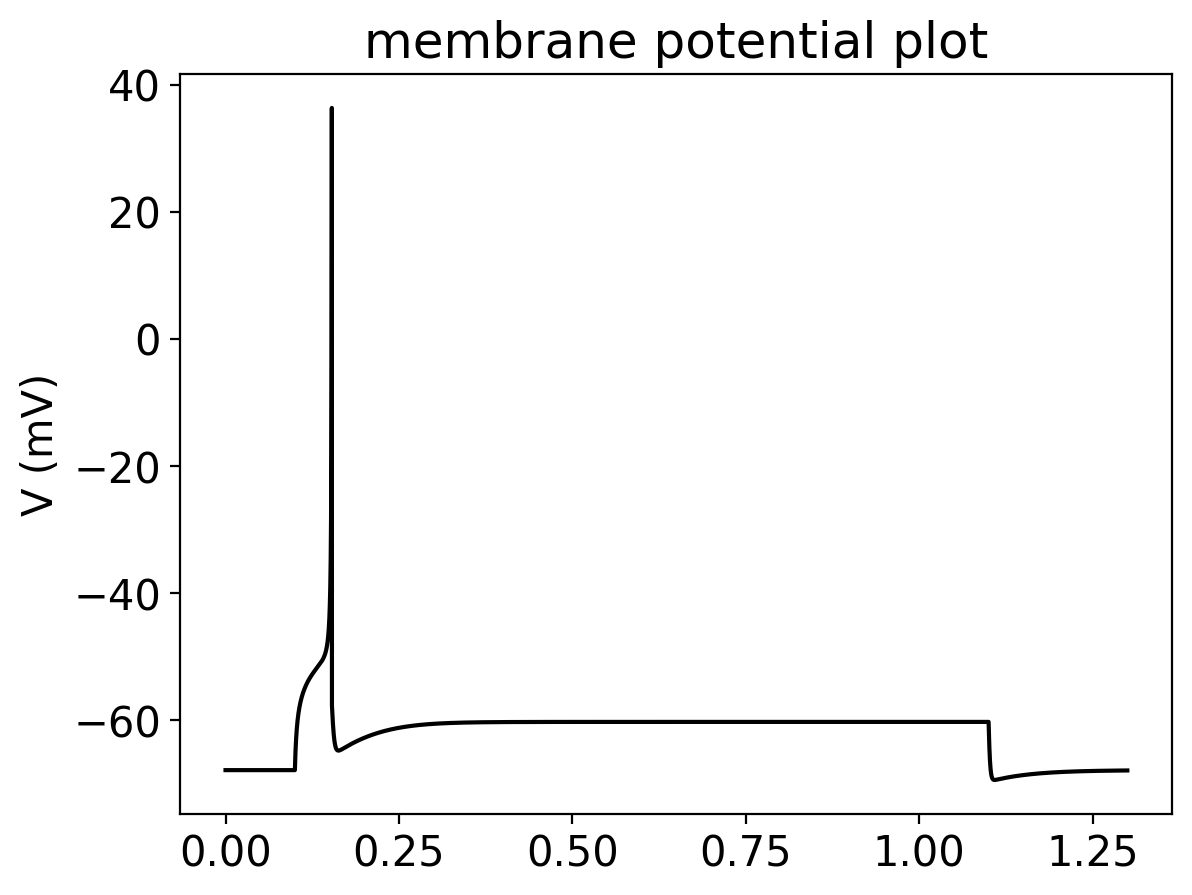

In [3]:
MU = 8 
NGEN = 40
_,plt = inject_and_plot_model(target)
plt.show()

# Utilizing Parallel Rheobase
# Fit the HH model to an Izhi 
Generated waveform.
would probably speed this up substantially
Uncomment optimization_management 857-865

In [ ]:
model_type="HH"
fps = ['g_L','g_Na','g_K','vr'] 

results = sim_tests.optimize(backend=model_type,\
        protocol={'allen': False, 'elephant': True},\
            MU=MU,NGEN=NGEN,plot=True,free_parameters=fps)


In [ ]:
opt = results['pf'][0].dtc
OM.tests = opt.tests
opt = OM.format_test(opt)
opt.self_evaluate()
opt = OM.get_agreement(opt)
display(opt.agreement)

In [ ]:

plt = plot_score_history1(results)
plt.show()


In [ ]:
model = target.dtc_to_model()
check_binary_match(opt,target,snippets=True)
target = OM.format_test(target)
simulated_data_tests = target.tests
#


In [ ]:
check_binary_match(opt,target,snippets=False)


In [ ]:
display(pd.DataFrame([opt.attrs]))
import copy
temp = {}
for k in opt.attrs.keys():
    temp[k] = target.attrs[k]
display(pd.DataFrame([temp]))

What where the values of model parameters that where held constant?


In [ ]:
df0 = opt.dtc_to_model().default_attrs
df1 = target.dtc_to_model().default_attrs
hc = {}
for k,v in df0.items():
    if k not in opt.attrs.keys():
        assert df0[k] == df1[k]
        hc[k] = v        
display(pd.DataFrame([hc]))     

In [ ]:
from neuronunit.optimisation.model_parameters import MODEL_PARAMS

a_range = MODEL_PARAMS["HH"]['g_Na']
grid_a = np.linspace(a_range[0],a_range[1],10)
b_range = MODEL_PARAMS["HH"]['g_K']
grid_b = np.linspace(b_range[0],b_range[1],10);

In [ ]:
opt_sum = np.sum(opt.SA.values)
for_scatter = (opt.attrs['g_Na'],opt_sum)
from tqdm import tqdm
collect = []
mutant = copy.copy(opt)
for a in tqdm(grid_a):
    # non random mutation
    mutant.attrs['g_Na'] = a
    # Evaluate NU test suite
    mutant.self_evaluate()
    # sum components (optional)
    fit = np.sum(mutant.SA.values)
    collect.append(fit)
plt.plot(grid_a,collect)
plt.scatter(for_scatter[0],for_scatter[1],label='optima')
    

In [ ]:
%time
pred = opt.tests[0].generate_prediction(opt.dtc_to_model())
print(pred)

In [ ]:
from neuronunit.tests.fi import RheobaseTestP
rtp = RheobaseTestP(opt.tests[0].observation)

In [ ]:
#%time
#pred = rtp.generate_prediction(opt.dtc_to_model())
#print(pred)